# **Product Diversification:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

The research and development division of a manufacturing company has developed
three possible new products. However, to avoid undue diversification of the company's product line, management has imposed the following restriction:

Restriction 1: From the three possible new products, at most two should be
chosen to be produced.

Two plants are available that could produce the chosen products. For administrative reasons, management has imposed a second restriction in this regard:

Restriction 2: Just one of the two plants should be chosen to produce the new
products.

The production cost per unit of each product would be essentially the same in the two plants. However, because of differences in their production facilities, the number of hours of production time needed per unit of each product might differ between the two plants. These data are given in Table 12.2, along with the total number of production hours available per week for these products in each plant, unit profit for each product, and marketing estimates of the number of units of each product that could be sold per week if it is produced. The objective is to choose the products, the plant, and the production rates of the chosen products so as to maximize the total profit.

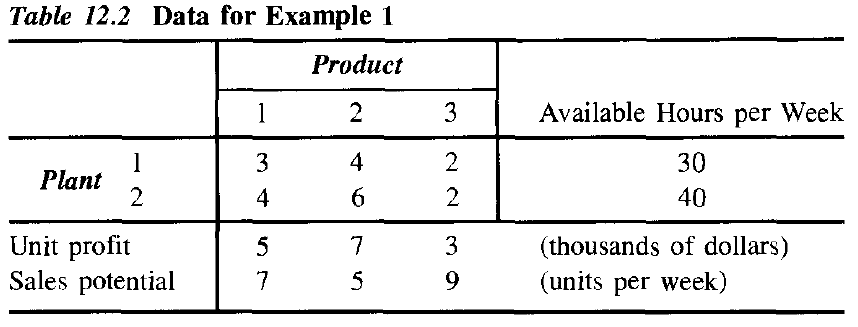

**Modeling:**

$x_{1},x_{2},x_{3} \ $   continuous variables for products

$y_{j} \ $   binary variables

$\\ $

$Objective\ Function:\\ $

$Max\ Z = 5x_{1}+7x_{2}+3x_{3}$

$\\ $

$Constraints:\\ $

$3x_{1}+4x_{2}+2x_{3}\leq 30+My_{4}$

$4x_{1}+6x_{2}+2x_{3}\leq 40+M(1-y_{4})$

$x_{1}\leq 7$

$x_{2}\leq 5$

$x_{3}\leq 9$

$x_{1}\leq My_{1}$

$x_{2}\leq My_{2}$

$x_{3}\leq My_{3}$

$y_{1}+y_{2}+y_{3}\leq 2$

$x_{1},x_{2},x_{3} \geq 0 $

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
#Defining Variables

x = LpVariable.dicts('x', ((i) for i in [1,2,3]), lowBound=0, cat='Continuous')
y = LpVariable.dicts('y', ((i) for i in [1,2,3,4]), cat='Binary')

In [3]:
#Defining Objective Function

model = LpProblem('model', LpMaximize)

model += 5*x[1]+7*x[2]+3*x[3]

In [4]:
#Constraints

M = 100000

model += 3*x[1]+4*x[2]+2*x[3] <= 30+M*y[4]
model += 4*x[1]+6*x[2]+2*x[3] <= 40+M*(1-y[4])
model += x[1] <= 7
model += x[2] <= 5
model += x[3] <= 9
model += x[1] <= M*y[1]
model += x[2] <= M*y[2]
model += x[3] <= M*y[3]
model += y[1]+y[2]+y[3] <= 2

In [5]:
#Model summary

model

model:
MAXIMIZE
5*x_1 + 7*x_2 + 3*x_3 + 0
SUBJECT TO
_C1: 3 x_1 + 4 x_2 + 2 x_3 - 100000 y_4 <= 30

_C2: 4 x_1 + 6 x_2 + 2 x_3 + 100000 y_4 <= 100040

_C3: x_1 <= 7

_C4: x_2 <= 5

_C5: x_3 <= 9

_C6: x_1 - 100000 y_1 <= 0

_C7: x_2 - 100000 y_2 <= 0

_C8: x_3 - 100000 y_3 <= 0

_C9: y_1 + y_2 + y_3 <= 2

VARIABLES
x_1 Continuous
x_2 Continuous
x_3 Continuous
0 <= y_1 <= 1 Integer
0 <= y_2 <= 1 Integer
0 <= y_3 <= 1 Integer
0 <= y_4 <= 1 Integer

In [6]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 54.5


In [7]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:5.5
x_2:0.0
x_3:9.0
y_1:1.0
y_2:0.0
y_3:1.0
y_4:1.0


In [8]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,5.5
2,x_2,0.0
3,x_3,9.0
4,y_1,1.0
5,y_2,0.0
6,y_3,1.0
7,y_4,1.0


## Using Pyomo Library

In [9]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package

In [10]:
model = ConcreteModel()

M = 100000
model.indicesx = Set(initialize=[1,2,3])
model.indicesy = Set(initialize=[1,2,3,4])
model.x = Var(model.indicesx, domain=NonNegativeReals)
model.y = Var(model.indicesy, domain=Binary)

model.obj = Objective(expr=5*model.x[1]+7*model.x[2]+3*model.x[3], sense=maximize)

model.constraint1 = Constraint(expr=3*model.x[1]+4*model.x[2]+2*model.x[3] <= 30+M*model.y[4])
model.constraint2 = Constraint(expr=4*model.x[1]+6*model.x[2]+2*model.x[3] <= 40+M*(1-model.y[4]))
model.constraint3 = Constraint(expr=model.x[1] <= 7)
model.constraint4 = Constraint(expr=model.x[2] <= 5)
model.constraint5 = Constraint(expr=model.x[3] <= 9)
model.constraint6 = Constraint(expr=model.x[1] <= M*model.y[1])
model.constraint7 = Constraint(expr=model.x[2] <= M*model.y[2])
model.constraint8 = Constraint(expr=model.x[3] <= M*model.y[3])
model.constraint9 = Constraint(expr=model.y[1]+model.y[2]+model.y[3] <= 2)

SolverFactory('glpk').solve(model)

model.display()

Model unknown

  Variables:
    x : Size=3, Index=indicesx
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   5.5 :  None : False : False : NonNegativeReals
          2 :     0 :   0.0 :  None : False : False : NonNegativeReals
          3 :     0 :   9.0 :  None : False : False : NonNegativeReals
    y : Size=4, Index=indicesy
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  54.5

  Constraints:
    constraint1 : Size=1
        Key  : Lower : Body     : Upper
        None :  None : -99995.5 :   0.0
    constraint2 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  0.0 :   

In [12]:
print("Variable values:")
model.x.pprint()
model.y.pprint()

Variable values:
x : Size=3, Index=indicesx
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   5.5 :  None : False : False : NonNegativeReals
      2 :     0 :   0.0 :  None : False : False : NonNegativeReals
      3 :     0 :   9.0 :  None : False : False : NonNegativeReals
y : Size=4, Index=indicesy
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   1.0 :     1 : False : False : Binary
      2 :     0 :   0.0 :     1 : False : False : Binary
      3 :     0 :   1.0 :     1 : False : False : Binary
      4 :     0 :   1.0 :     1 : False : False : Binary
